In [149]:
import pandas as pd
import geopandas  as gpd
import sys
from shapely.geometry import Point
SHAPEFILE = "../../../interim/hj_andrews_good_plots.shp"

In [5]:
hj_and_gdf = gpd.read_file(SHAPEFILE)

In [6]:
hj_and_gdf.sample(3)

,DBCODE,LOCATION_C,KEYWORD_NA,WEST_BOUND,EAST_BOUND,NORTH_BOUN,SOUTH_BOUN,ELEVATION_,ELEVATIO_1,SLOPE_perc,ASPECT_deg,area,geometry
11,TV010,RS28,Reference Stand RS28; H.J. Andrews EF; Willame...,-122.169544,-122.168199,44.243239,44.242272,1083.0,1043.0,24.47,92.0,11549,"POLYGON ((-122.16954395 44.24227191, -122.1695..."
7,TV010,RS30,Reference Stand RS30; H.J. Andrews EF; Willame...,-122.149937,-122.148216,44.231250,44.230012,909.0,874.0,30.14,7.0,18915,"POLYGON ((-122.14993666 44.2300124, -122.14993..."
2,TV010,RS04,Reference Stand RS04; H.J. Andrews EF; Willame...,-122.137691,-122.136822,44.273367,44.272743,1312.0,1276.0,43.61,278.0,4810,"POLYGON ((-122.13769081 44.27274323, -122.1376..."


In [80]:
hj_and_gdf['DBCODE'].unique()

array(['TV010'], dtype=object)

In [81]:
good_plots = hj_and_gdf['DBCODE'].unique()

In [99]:
FILE = "./initial_tree_conditions_with_spatial_coordinates_2017_11_09.csv"
t = pd.read_csv(FILE, sep=',', delimiter=',', dtype='str')

In [100]:
t['DBCODE'].unique()

array(['TV010'], dtype=object)

In [101]:
t.sample(4)

,DBCODE,ENTITY,TREEID,PSP_STUDYID,STANDID,PLOTNUMBER,QUARTER,TAG,SPECIES,YEAR,...,CROWN1,CROWN2,CROWN3,BOLE1,BOLE2,BOLE3,ROOT,DISTURB1,DISTURB2,AGE
39051,TV010,1,RS35000800030,HJRS,RS35,8,0,8832,PSME,1980,...,1,U,U,2,U,U,1,1,U,NaN
18718,TV010,1,LMCC001600022,SQNP,LMCC,16,0,564,ABMA,1982,...,8,U,U,1,U,U,1,1,U,NaN
42322,TV010,1,SRNA000500041,NFGY,SRNA,5,0,5502,ABAM,1984,...,1,U,U,2,U,U,1,1,U,NaN
26107,TV010,1,PP17000600012,MRRS,PP17,6,0,9613,TSHE,1978,...,1,U,U,1,U,U,1,1,U,NaN


In [102]:
t = t[t['DBCODE'].isin(good_plots)]

In [111]:
plot_with_XY = t[~t['XCOORD'].isna()]

In [112]:
plot_with_XY.head(2)

,DBCODE,ENTITY,TREEID,PSP_STUDYID,STANDID,PLOTNUMBER,QUARTER,TAG,SPECIES,YEAR,...,CROWN1,CROWN2,CROWN3,BOLE1,BOLE2,BOLE3,ROOT,DISTURB1,DISTURB2,AGE
335,TV010,1,AE10000100001,MRRS,AE10,1,0,7155,ABAM,1978,...,1,U,U,2,U,U,1,3,U,NaN
336,TV010,1,AE10000100002,MRRS,AE10,1,0,7156,ABAM,1978,...,1,U,U,2,U,U,1,3,U,NaN


In [113]:
tree_info_df = pd.read_csv("remeasurement_2017-11-09.csv")

In [115]:
tree_info_df.sample(2)

,DBCODE,ENTITY,TREEID,PSP_STUDYID,STANDID,PLOTNUMBER,QUARTER,SPECIES,TAG,YEAR,...,CANOPY_CLASS,TREE_VIGOR,CROWN_RATIO,MAIN_STEM,ROOTING,CROWN_PCT,TREE_PCT,LEAN_ANGLE,SAMPLEDATE,CHECK_NOTES
177144,TV010,2,FRD2000100390,RMRS,FRD2,1,0,PICO,408,1947,...,U,U,NaN,9,9,NaN,NaN,NaN,01-07-47,NaN
451162,TV010,2,SRNA000100036,NFGY,SRNA,1,0,TSME,8536,1984,...,S,1,NaN,9,9,NaN,NaN,NaN,01-09-84,NaN


In [126]:
tree_info_df.columns

Index(['DBCODE', 'ENTITY', 'TREEID', 'PSP_STUDYID', 'STANDID', 'PLOTNUMBER',
       'QUARTER', 'SPECIES', 'TAG', 'YEAR', 'TREE_STATUS', 'DBH', 'DBH_CODE',
       'CANOPY_CLASS', 'TREE_VIGOR', 'CROWN_RATIO', 'MAIN_STEM', 'ROOTING',
       'CROWN_PCT', 'TREE_PCT', 'LEAN_ANGLE', 'SAMPLEDATE', 'CHECK_NOTES'],
      dtype='object')

In [120]:
plot_with_XY_sub= plot_with_XY[['TREEID', 'XCOORD', 'YCOORD']]

In [121]:
plot_with_XY_sub.sample(3)

,TREEID,XCOORD,YCOORD
29261,RS13001100014,245.87,155.84
19523,MRNA020800017,170.41,42.18
10799,GMNF004200002,133.8,170.39


In [131]:
# merge data from remesurement with data from tree height
tree_height = pd.read_csv('Tree heights_2017-11-09.csv')

In [132]:
tree_height.sample(3)

,DBCODE,ENTITY,PSP_STUDYID,STANDID,PLOTNUMBER,TAG,SPECIES,YEAR,DBH,SLOPEDIST,ANBASE,ANCRBASE,ANTOP,ADDHT,HEIGHT,CRBASEHT,BROKEN,SAMPLEDATE,COMMENTS
16473,TV010,4,RMRS,FRD1,1,249,ABLA2,1942,14.2,NaN,NaN,NaN,NaN,NaN,12.8,NaN,NaN,01-08-42,NaN
13144,TV010,4,HSGY,HS04,8,9130,PISI,1999,13.4,NaN,NaN,NaN,NaN,NaN,9.4,3.2,NaN,01-06-99,NaN
11188,TV010,4,HSGY,CH04,4,448,TSHE,1940,37.3,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN,01-09-40,NaN


In [136]:
tree_height_utile = tree_height[['TAG', 'HEIGHT']]

In [137]:
tree_complete = pd.merge(plot_with_XY_sub, tree_info_df, left_on='TREEID', right_on='TREEID')

In [138]:
tree_complete = pd.merge(tree_complete, tree_height_utile, on='TAG')

In [139]:
tree_complete.sample(3)

,TREEID,XCOORD,YCOORD,DBCODE,ENTITY,PSP_STUDYID,STANDID,PLOTNUMBER,QUARTER,SPECIES,...,TREE_VIGOR,CROWN_RATIO,MAIN_STEM,ROOTING,CROWN_PCT,TREE_PCT,LEAN_ANGLE,SAMPLEDATE,CHECK_NOTES,HEIGHT
1004899,OL01000200111,37.08,32.66,TV010,2,DFGY,OL01,2,0,PSME,...,U,NaN,9,9,NaN,NaN,NaN,01-07-36,NaN,33.5
921554,OL01000200069,51.88,55.56,TV010,2,DFGY,OL01,2,0,PSME,...,U,NaN,9,9,NaN,NaN,NaN,01-04-71,NaN,44.5
821536,OL01000300027,45.22,17.13,TV010,2,DFGY,OL01,3,0,TSHE,...,U,NaN,9,9,NaN,NaN,NaN,01-04-71,NaN,46.0


In [141]:
tree_complete.to_csv("../../../processed/hj_andrew_trees_with_info.csv")

In [125]:
tree_complete.head(3)

,TREEID,XCOORD,YCOORD,DBCODE,ENTITY,PSP_STUDYID,STANDID,PLOTNUMBER,QUARTER,SPECIES,...,CANOPY_CLASS,TREE_VIGOR,CROWN_RATIO,MAIN_STEM,ROOTING,CROWN_PCT,TREE_PCT,LEAN_ANGLE,SAMPLEDATE,CHECK_NOTES
0,AE10000100001,0.44,94.12,TV010,2,MRRS,AE10,1,0,ABAM,...,S,2,NaN,9,9,NaN,NaN,NaN,01-08-78,NaN
1,AE10000100001,0.44,94.12,TV010,2,MRRS,AE10,1,0,ABAM,...,I,2,NaN,9,9,NaN,NaN,NaN,01-06-83,NaN
2,AE10000100001,0.44,94.12,TV010,2,MRRS,AE10,1,0,ABAM,...,I,2,NaN,9,9,NaN,NaN,NaN,01-07-88,NaN


In [143]:
tree_complete.columns

Index(['TREEID', 'XCOORD', 'YCOORD', 'DBCODE', 'ENTITY', 'PSP_STUDYID',
       'STANDID', 'PLOTNUMBER', 'QUARTER', 'SPECIES', 'TAG', 'YEAR',
       'TREE_STATUS', 'DBH', 'DBH_CODE', 'CANOPY_CLASS', 'TREE_VIGOR',
       'CROWN_RATIO', 'MAIN_STEM', 'ROOTING', 'CROWN_PCT', 'TREE_PCT',
       'LEAN_ANGLE', 'SAMPLEDATE', 'CHECK_NOTES', 'HEIGHT'],
      dtype='object')

In [205]:
tree_data = tree_complete[['TREEID', 'XCOORD', 'YCOORD', 'SPECIES', 'CROWN_RATIO', 'LEAN_ANGLE', 'HEIGHT']]

In [206]:

#

In [207]:
tree_data.loc[:,'XCOORD'] = pd.to_numeric(tree_data.loc[:,'XCOORD'], errors='coerce')
tree_data.loc[:,'YCOORD'] = pd.to_numeric(tree_data.loc[:,'YCOORD'], errors='coerce')

C:\Users\Martins\Anaconda3\envs\viz3d\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [209]:
tree_data['geometry'] = list(zip(tree_data.XCOORD, tree_data.YCOORD))

C:\Users\Martins\Anaconda3\envs\viz3d\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [210]:
type(tree_data.XCOORD[0])

numpy.float64

In [212]:
tree_data['geometry'] = tree_data['geometry'].apply(Point)

C:\Users\Martins\Anaconda3\envs\viz3d\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [213]:
crs = {'init':'4326'}
gp_df = gpd.GeoDataFrame(tree_data, crs=crs, geometry=tree_data.geometry)

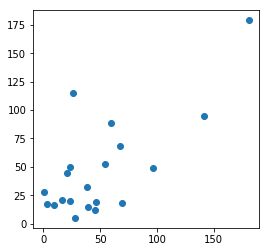

In [220]:
gp_df.sample(20).plot()

In [221]:
gp_df.sample(5)

,TREEID,XCOORD,YCOORD,SPECIES,CROWN_RATIO,LEAN_ANGLE,HEIGHT,geometry
308790,MRNA020900024,168.20,61.96,PIPO,20.0,NaN,17.3,POINT (168.2 61.96)
563073,RS08000100027,23.28,22.46,PSME,NaN,NaN,50.3,POINT (23.28 22.46)
584569,RS08000100046,20.48,25.61,PSME,NaN,NaN,21.6,POINT (20.48 25.61)
733273,RS03000600016,62.29,4.09,TSHE,NaN,NaN,46.0,POINT (62.29 4.09)
632654,RS26000900005,91.61,36.73,PSME,NaN,NaN,14.0,POINT (91.61 36.73)


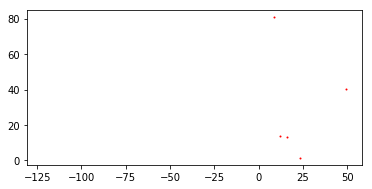

In [238]:
base = hj_and_gdf.plot(color='blue')
gp_df.sample(5).plot(ax=base, marker='o', color='red', markersize=1)

NameError: name 'gpd_df' is not defined

In [234]:
help(gpd.tools)

Help on package geopandas.tools in geopandas:

NAME
    geopandas.tools

PACKAGE CONTENTS
    geocoding
    overlay
    sjoin
    tests (package)
    util

FUNCTIONS
    collect(x, multi=False)
        Collect single part geometries into their Multi* counterpart
        
        Parameters
        ----------
        x : an iterable or Series of Shapely geometries, a GeoSeries, or
            a single Shapely geometry
        multi : boolean, default False
            if True, force returned geometries to be Multi* even if they
            only have one component.
    
    geocode(strings, provider='googlev3', **kwargs)
        Geocode a set of strings and get a GeoDataFrame of the resulting points.
        
        Parameters
        ----------
        strings : list or Series of addresses to geocode
        provider : str or geopy.geocoder
            Specifies geocoding service to use, default is 'googlev3'.
            Either the string name used by geopy (as specified in
          